<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2024/blob/main/notebooks/3_porzadkowanie_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.get_option("max_rows")

60

In [ ]:
pzn = pd.read_excel("rent-poznan.xlsx")
pzn.head(n=2)

,id,date_activ,date_modif,date_expire,individual,price,flat_area,flat_rooms,flat_floor_no,flat_build_year,...,flat_internet,flat_television,flat_phone,flat_anti_blinds,flat_anti_doors_windows,flat_intercom,flat_monitoring,flat_alarm_sys,flat_closed_area,quarter
0,19576742,2015-03-24,2020-09-05,2020-10-05,True,1400,30.0,1,2.0,0,...,False,False,False,False,False,True,False,False,False,Rataje
1,20292499,2013-07-19,2020-08-30,2020-09-09,True,4600,160.0,4,4.0,1900,...,True,True,True,False,False,True,True,True,False,Stare Miasto


In [ ]:
pzn.shape

(16448, 51)

In [ ]:
pd.set_option("max_rows", 100)
dzielnice = pzn.value_counts("quarter").reset_index()
pzn_dzielnice = dzielnice["quarter"][:20]
pzn_dzielnice

0         Grunwald
1          Centrum
2           Jeżyce
3            Wilda
4           Rataje
5     Stare Miasto
6         Piątkowo
7        Winogrady
8           Łazarz
9       Naramowice
10     Nowe Miasto
11         Górczyn
12          Sołacz
13          Dębiec
14          Ogrody
15        Marcelin
16           Malta
17         Winiary
18        Podolany
19     Stary Rynek
Name: quarter, dtype: object

In [ ]:
pzn_analiza = pzn[pzn["quarter"].isin(set(pzn_dzielnice))]
pzn_analiza.shape

(14845, 51)



* price -- destymulanta
* flat_area -- stymulanta
* flat_rooms -- stymulanta
* individual -- stymulanta
* flat_furnished -- stymulanta
* flat_deposit -- destymulanta
* flat_for_students -- destymulanta
* flat_balcony -- stymulanta



In [ ]:
zmienne_diag = ["price", "flat_area", "flat_rooms", "individual",
                "flat_furnished", "flat_deposit", "flat_for_students",
                "flat_balcony", "quarter"]

In [ ]:
pzn_do_porz = pzn_analiza[zmienne_diag].groupby("quarter").mean().reset_index()
pzn_do_porz

,quarter,price,flat_area,flat_rooms,individual,flat_furnished,flat_deposit,flat_for_students,flat_balcony
0,Centrum,1976.636023,48.908299,1.886804,0.143215,0.447154,1192.654597,0.267667,0.453408
1,Dębiec,1489.481651,42.717339,1.908257,0.357798,0.486239,1338.256881,0.238532,0.486239
2,Grunwald,1813.411342,48.334080,2.025815,0.256877,0.490901,1553.841727,0.229369,0.541261
3,Górczyn,1663.558824,48.076732,2.058824,0.336601,0.428105,1295.781046,0.232026,0.571895
4,Jeżyce,1805.601509,48.537593,1.910151,0.267490,0.473937,1193.857339,0.258573,0.496571
5,Malta,1858.786667,50.121267,2.060000,0.393333,0.513333,1445.200000,0.206667,0.646667
6,Marcelin,2025.411765,45.973529,2.011765,0.429412,0.547059,1646.117647,0.211765,0.817647
7,Naramowice,1701.723133,52.102914,2.251366,0.364299,0.520947,1430.025501,0.255009,0.672131
8,Nowe Miasto,1796.876209,50.073946,2.108317,0.284333,0.448743,1115.288201,0.214700,0.676983
9,Ogrody,1863.412088,46.189945,2.049451,0.258242,0.445055,1235.439560,0.225275,0.489011


In [ ]:
pzn_do_porz["z1"] = (np.max(pzn_do_porz["price"]) - pzn_do_porz["price"]) / (np.max(pzn_do_porz["price"]) - np.min(pzn_do_porz["price"]))
pzn_do_porz["z2"] = (pzn_do_porz["flat_area"]- np.min(pzn_do_porz["flat_area"])) / (np.max(pzn_do_porz["flat_area"]) - np.min(pzn_do_porz["flat_area"]))


In [ ]:
dest = pzn_do_porz[
    ["price", "flat_for_students", "flat_deposit"]
    ].apply(lambda x: (np.max(x) - x) / (np.max(x) - np.min(x)))

## zmiana kolumn i funkcji dla stymulant
stym = pzn_do_porz[
    ["flat_area", "flat_rooms", "individual","flat_furnished", "flat_balcony"]
    ].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

dest.describe()


,price,flat_for_students,flat_deposit
count,20.000000,20.000000,20.000000
mean,0.478082,0.711820,0.474595
std,0.272565,0.250479,0.226917
min,0.000000,0.000000,0.000000
25%,0.286996,0.641018,0.330912
50%,0.418288,0.798500,0.495660
75%,0.721464,0.869409,0.594714
max,1.000000,1.000000,1.000000


Łączymy zbiory ze stymulantami i destymulantami, a potem dodajemy nazwę dzielnicy.

In [ ]:
dane_index = pd.concat([pzn_do_porz["quarter"], stym, dest], axis = 1)
dane_index.head(n=2)

,quarter,flat_area,flat_rooms,individual,flat_furnished,flat_balcony,price,flat_for_students,flat_deposit
0,Centrum,0.659625,0.120194,0.000000,0.363237,0.362791,0.091011,0.663777,0.595708
1,Dębiec,0.000000,0.167880,0.565925,0.536210,0.420225,1.000000,0.796806,0.435250


In [ ]:
dane_index["miernik"] = dane_index.loc[:, "flat_area":"flat_deposit"].mean(axis=1)
dane_index[["quarter", "miernik"]]
dane_index.sort_values("miernik", ascending=False, inplace=True)
dane_index[["quarter", "miernik"]]

,quarter,miernik
7,Naramowice,0.701067
11,Podolany,0.692159
10,Piątkowo,0.626471
8,Nowe Miasto,0.613222
5,Malta,0.610162
17,Winiary,0.593109
12,Rataje,0.581203
18,Winogrady,0.563447
3,Górczyn,0.552046
6,Marcelin,0.540009


### Miernik wzorcowy

Wyznaczamy miernik wzorcowy zgodnie ze wzorem (7) z materiałów dot. porządkowania liniowego.

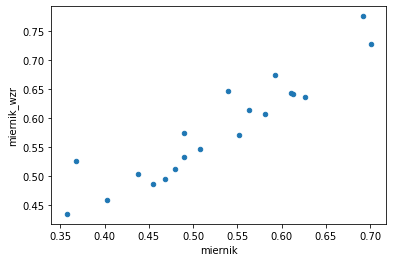

In [ ]:
dane_index["miernik_wzr"] = (
    dane_index
    .loc[:, "flat_area":"flat_deposit"]
    .apply(lambda x: (x - 0)**2, axis = 0)
    .apply(lambda x: np.sqrt(sum(x) / len(x)), axis = 1)

)

dane_index[["quarter", "miernik", "miernik_wzr"]].sort_values("miernik_wzr", ascending=True)

dane_index[["quarter", "miernik", "miernik_wzr"]].plot.scatter(x = "miernik", y = "miernik_wzr")

Dodajemy rangi do zbioru danych, które powiedzą o porządku dzielnic Poznania według omawianych mierników.



In [ ]:
dane_index["poz_bezwzor"] = dane_index["miernik"].rank(ascending=True).astype(int)
dane_index["poz_wzor"] = dane_index["miernik_wzr"].rank(ascending=True).astype(int)
dane_index[["quarter", "miernik", "miernik_wzr", "poz_bezwzor", "poz_wzor"]].sort_values("poz_bezwzor")

,quarter,miernik,miernik_wzr,poz_bezwzor,poz_wzor
0,Centrum,0.357043,0.435440,1,1
15,Stary Rynek,0.368100,0.526347,2,7
19,Łazarz,0.402822,0.458816,3,2
16,Wilda,0.437652,0.503955,4,5
9,Ogrody,0.455285,0.486604,5,3
4,Jeżyce,0.468733,0.495575,6,4
2,Grunwald,0.479077,0.513311,7,6
14,Stare Miasto,0.490026,0.533139,8,8
1,Dębiec,0.490287,0.574120,9,11
13,Sołacz,0.507697,0.547319,10,9


Zadanie 4. W pliku powiaty.xlsx znajdują się informacje o zmiennych opisujących
rynek pracy w województwie wielkopolskim. W oparciu o metodę wzorcową i bezwzorcową utwórz ranking powiatów ze względu na sytuację panującą na rynku pracy.

Poszczególne zmienne oznaczają:

* x1s - udział procentowy zatrudnionych w sektorze prywatnym w liczbie zatrudnionych ogółem;
* x2s - przeciętne miesięczne wynagrodzenie (brutto);
* x3d - stopa bezrobocia rejestrowanego;
* x4d - udział procentowy bezrobotnych do 25 roku życia w ogólnej liczbie bezrobotnych;
* x5d - udział procentowy długotrwale bezrobotnych w ogólnej liczbie bezrobotnych;
* x6d - udział procentowy bezrobotnych bez stażu lub ze stażem do 1 roku w ogólnej liczbie bezrobotnych;


In [ ]:
def indeks_bezwz(plik, jednostka):
  dane=pd.read_excel(plik)
  s = dane.filter(regex = "_s").apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
  d = dane.filter(regex = "_d").apply(lambda x: (np.max(x) - x) / (np.max(x) - np.min(x)))
  wyn=pd.concat([dane[jednostka],s,d], axis=1)
  wyn["miernik"]=wyn.filter(regex="_(s|d)$").mean(axis=1)
  wyn.sort_values("miernik", ascending=False, inplace=True)
  return wyn[[jednostka, "miernik"]]


In [ ]:
indeks_bezwz("Powiaty.xlsx", "Powiaty")

,Powiaty,miernik
34,Poznań,0.867575
20,poznański,0.796835
33,Leszno,0.691035
31,Kalisz,0.643147
23,szamotulski,0.629432
28,wolsztyński,0.625491
12,leszczyński,0.625481
17,ostrzeszowski,0.618537
10,kościański,0.612419
24,średzki,0.601480


### Przetarzanie potokowe

1. wczytaj zbiór `rent-poznan`
2. wybierz wiersze gdzie `price` jest w przedziale (1000, 5000)
3. zgrupuj zbiór danych wedlug zmiennej `quarter`
4. wyznacz średnią cenę
5. posortuj według ceny

In [ ]:
(
    pzn
    .query("price > 1000 & price < 5000")
    .groupby("quarter")["price"]
    .mean()
    .reset_index()
    .sort_values("price", ascending=False)
    .head(n=5)
)

,quarter,price
25,Kotowo,4000.000000
30,Marlewo,3800.000000
44,Pokrzywno,3500.000000
1,Bajkowe,2833.333333
45,Radojewo,2800.000000
